Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [32]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [33]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_file(file_name = 'file_name.csv'):
    with open(file_name, 'rb') as file:
        return list(unicodecsv.DictReader(file))
    
daily_engagement = read_file('daily_engagement.csv')
project_submissions = read_file('project_submissions.csv')

print enrollments[0], '\n\n', daily_engagement[0], '\n\n', project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'} 

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'} 

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [34]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [35]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [36]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [37]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def unique_entry_count(list_of_dicts = [], key = ''): #-> int
    return len(set([entry[key] for entry in list_of_dicts]))

# enrollments
enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = unique_entry_count(enrollments, 'account_key')

# daily_engagement
engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = unique_entry_count(daily_engagement, 'acct')

# project_submissions
submission_num_rows = len(project_submissions)
submission_num_unique_students = unique_entry_count(project_submissions, 'account_key')

In [38]:
# print data
import pandas as pd
student_info_df = pd.DataFrame(
    {"file_name": ["enrollments", "daily_engagement", "project_submissions"],
     "rows": [enrollment_num_rows, engagement_num_rows, submission_num_rows],
     "unique_students": [enrollment_num_unique_students, engagement_num_unique_students, submission_num_unique_students]})
print(student_info_df.to_string())

             file_name    rows  unique_students
0          enrollments    1640             1302
1     daily_engagement  136240             1237
2  project_submissions    3642              743


## Problems in the Data

In [39]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for entry in daily_engagement:
    try:
        entry['account_key'] = entry.pop('acct')
    except:
        pass

In [40]:
# check for rename
import pandas as pd
print pd.DataFrame(daily_engagement).columns

Index([          u'account_key',     u'lessons_completed',
         u'num_courses_visited',    u'projects_completed',
       u'total_minutes_visited',              u'utc_date'],
      dtype='object')


In [41]:
# assignment check from the course video

print daily_engagement[0]['account_key']

0


## Missing Engagement Records

In [42]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

def unique_students(list_of_dicts = [], key = ''): #-> []
    return set([entry[key] for entry in list_of_dicts])

unique_enrollments = unique_students(enrollments, 'account_key')
unique_engagements = unique_students(daily_engagement, 'account_key')

missing_engagements = [student for student in unique_enrollments if student not in unique_engagements]

# print first ("any one") problem enrollment
for record in enrollments:
    if record['account_key'] == missing_engagements[0]:
        print record
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 4, 0, 0), u'account_key': u'1145', u'cancel_date': datetime.datetime(2015, 4, 4, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [43]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

print len(missing_engagements)

missing_engagements_w_enroll_length = [record['account_key'] for record in enrollments if record['account_key'] in missing_engagements and record['join_date'] !=record['cancel_date']]
print len(missing_engagements_w_enroll_length)

65
3


## Tracking Down the Remaining Problems

In [44]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [45]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [46]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [47]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for record in non_udacity_enrollments:
    if (not record['is_canceled']) or record['days_to_cancel'] > 7:
        student = record['account_key']
        join_date = record['join_date']
        
        if student not in paid_students or join_date > paid_students[student]:
            paid_students[student] = join_date

In [48]:
print len(paid_students)

995


## Getting Data from First Week

In [49]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [50]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = [student for student in daily_engagement if student['account_key'] in paid_students and within_one_week(paid_students[student['account_key']],student['utc_date'])]

In [51]:
print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [61]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
'''
# starter code
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
'''

def consolidate_by_key(data_list = [{}], consolidation_key = ''):
        ''' take a list of dictionaries and groups entries by the passed key.
            example: group all engagement data points by account number'''
        grouped_dict = defaultdict(list)
        [grouped_dict[record[consolidation_key]].append(record) for record in data_list]
        return grouped_dict

In [62]:
# check that function returns the same
# print engagement_by_account == consolidate_by_key(paid_engagement_in_first_week, 'account_key')

# returned True, so commented out for re-run

True


In [54]:
engagement_by_account = consolidate_by_key(paid_engagement_in_first_week, 'account_key')

In [63]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    
def isolate_records_by_key(consolidated_dict_list = {'key': [{}]}, key_of_interest = ''): #-> {'key': []}
    return {key: sum([data_point[key_of_interest] for data_point in data_points]) for key, data_points in consolidated_dict_list.iteritems()}

In [64]:
# test
print isolate_records_by_key(engagement_by_account,'total_minutes_visited') == total_minutes_by_account

True


In [65]:
import numpy as np

# changed stat summary to a function
def print_stat_summary(value_list = []): #-> None
    ''' prints the mean, std, min, and max for the input list; returns None '''
    print 'Mean:', np.mean(value_list)
    print 'Standard deviation:', np.std(value_list)
    print 'Minimum:', np.min(value_list)
    print 'Maximum:', np.max(value_list)
    
# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print_stat_summary(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [183]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# within_one_week adapted to reflect engagement dates not only < 7 days but also >= 0

## Lessons Completed in First Week

In [73]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

engagement_by_account = consolidate_by_key(paid_engagement_in_first_week, 'account_key')
lessons_by_account = isolate_records_by_key(engagement_by_account, 'lessons_completed')
print_stat_summary(lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [108]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def days_visited_by_record_key(consolidated_dict_list = {'key': [{}]}): #-> {'key': []}
    ''' '''
    def has_visited(record = {}): # -> int(bool)
        return int(record['num_courses_visited'] > 0)
    
    return {key: sum([has_visited(data_point) for data_point in data_points]) for key, data_points in consolidated_dict_list.iteritems()}

days_visited_by_account = days_visited_by_record_key(consolidate_by_key(paid_engagement_in_first_week, 'account_key'))
print_stat_summary(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [82]:
print paid_engagement_in_first_week[10]

{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'1', u'utc_date': datetime.datetime(2015, 5, 9, 0, 0)}


In [90]:
print 1 in [1,2,3,4,5]

True


In [102]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
passing_rating = ['PASSED', 'DISTINCTION']

paid_submissions = [record for record in non_udacity_submissions if record['account_key'] in paid_students]

passed_subway_project = set([record['account_key'] for record in paid_submissions\
    if record['lesson_key'] in subway_project_lesson_keys and record['assigned_rating'] in passing_rating])

In [103]:
passing_engagement = []
non_passing_engagement = []
for record in paid_engagement_in_first_week:
    if record['account_key'] in passed_subway_project:
        passing_engagement.append(record)
    else:
        non_passing_engagement.append(record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [105]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

In [104]:
passing_engagements_by_account = consolidate_by_key(passing_engagement, 'account_key')
non_passing_engagements_by_account = consolidate_by_key(non_passing_engagement, 'account_key')

print len(passing_engagements_by_account)
print len(non_passing_engagements_by_account)

647
348


In [107]:
# minute summary of passing and non-passing students
minutes_passing_engagements_by_account = isolate_records_by_key(passing_engagements_by_account, 'total_minutes_visited')
minutes_non_passing_engagements_by_account = isolate_records_by_key(non_passing_engagements_by_account, 'total_minutes_visited')
print "minute summary of passing students"
print_stat_summary(minutes_passing_engagements_by_account.values())
print "minute summary of non-passing students"
print_stat_summary(minutes_non_passing_engagements_by_account.values())

minute summary of passing students
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
minute summary of non-passing students
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [106]:
# lesson summary of passing and non-passing students
lessons_passing_engagements_by_account = isolate_records_by_key(passing_engagements_by_account, 'lessons_completed')
lessons_non_passing_engagements_by_account = isolate_records_by_key(non_passing_engagements_by_account, 'lessons_completed')
print "lesson summary of passing students"
print_stat_summary(lessons_passing_engagements_by_account.values())
print "lesson summary of non-passing students"
print_stat_summary(lessons_non_passing_engagements_by_account.values())

lesson summary of passing students
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
lesson summary of non-passing students
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


In [113]:
print "days summary of passing students"
days_passing_engagements_by_account = days_visited_by_record_key(passing_engagements_by_account)
print_stat_summary(days_passing_engagements_by_account.values())
print "days summary of non-passing students"
days_non_passing_engagements_by_account = days_visited_by_record_key(non_passing_engagements_by_account)
print_stat_summary(days_non_passing_engagements_by_account.values())

days summary of passing students
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
days summary of non-passing students
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

In [ ]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

In [120]:
test1 = [1,2,3,4]
test2 = [5,6]
test3 = [7,8]
test1.extend(test2 + test3)
print test2 + test3

[5, 6, 7, 8]


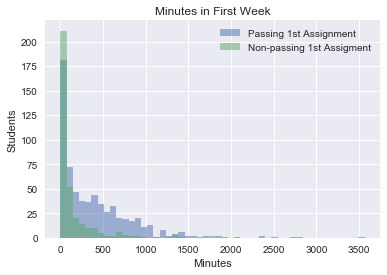

In [146]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline
min_pass = minutes_passing_engagements_by_account.values()
min_non_pass = minutes_non_passing_engagements_by_account.values()

min_bins = numpy.linspace(np.min(min_pass + min_non_pass), np.max(min_pass + min_non_pass))

plt.hist(min_pass, min_bins, alpha=0.5, label='Passing 1st Assignment')
plt.hist(min_non_pass, min_bins, alpha=0.5, label='Non-passing 1st Assigment')
plt.legend(loc='upper right')
plt.title('Minutes in First Week')
plt.xlabel('Minutes')
plt.ylabel('Students')
plt.show()

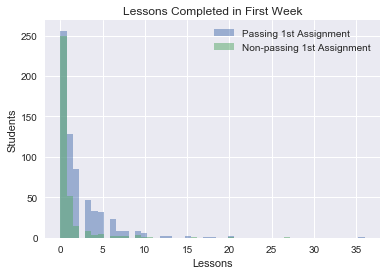

In [147]:
%matplotlib inline
lesson_pass = lessons_passing_engagements_by_account.values()
lesson_non_pass = lessons_non_passing_engagements_by_account.values()

lesson_bins = numpy.linspace(np.min(lesson_pass + lesson_non_pass), np.max(lesson_pass + lesson_non_pass))

plt.hist(lesson_pass, lesson_bins, alpha=0.5, label='Passing 1st Assignment')
plt.hist(lesson_non_pass, lesson_bins, alpha=0.5, label='Non-passing 1st Assignment')
plt.legend(loc='upper right')
plt.title('Lessons Completed in First Week')
plt.xlabel('Lessons')
plt.ylabel('Students')
plt.show()

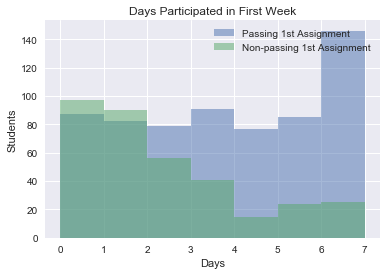

In [149]:
%matplotlib inline
days_pass = days_passing_engagements_by_account.values()
days_non_pass = days_non_passing_engagements_by_account.values()

days_bins = numpy.linspace(0, 7, 8)

plt.hist(days_pass, days_bins, alpha=0.5, label='Passing 1st Assignment')
plt.hist(days_non_pass, days_bins, alpha=0.5, label='Non-passing 1st Assignment')
plt.legend(loc='upper right')
plt.title('Days Participated in First Week')
plt.xlabel('Days')
plt.ylabel('Students')
plt.show()

## Improving Plots and Sharing Findings

In [148]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

# re-ran histograms above. already used parameters such as bins.